### 어제 답안

In [74]:
import sys
import cv2
import numpy as np
import random
from IPython.core.display import HTML

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

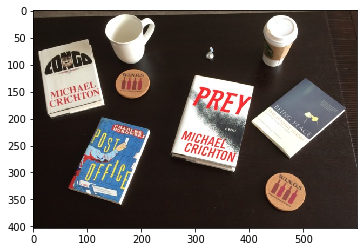

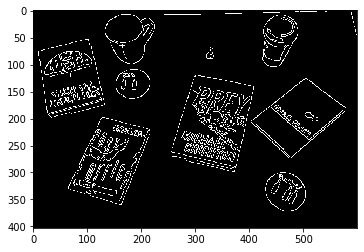

In [8]:
image = cv2.imread('vision/book.jpg')
imshow("", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("", edged)

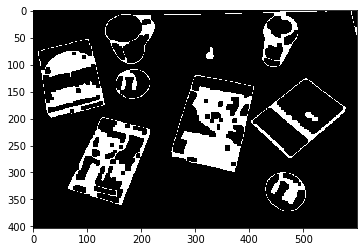

True

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", closed)

cv2.imwrite("result.png", closed)

8 4100.0
4 14438.5
4 13100.0
4 18798.0
8 2701.0
8 183.5
4 12816.5
10 11009.0


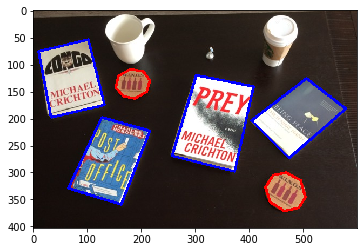

In [16]:
cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("vision/book.jpg")
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if len(approx) == 8 and area > 200 :        
        cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    if len(approx) == 4 :        
        cv2.drawContours(image, [approx], -1, (255, 0, 0), 4)        

imshow("", image)

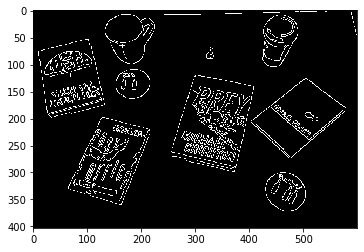

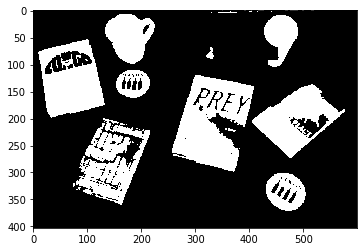

In [16]:
image = cv2.imread("vision/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
_, edged2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("", edged)
imshow("", edged2)


In [22]:
img = cv2.addWeighted(edged, 0.5, edged2, 0.5, 0.0)

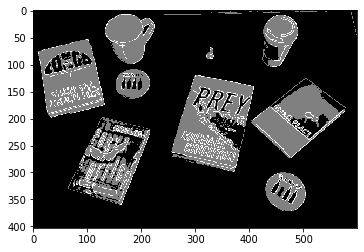

In [23]:
imshow("", img)

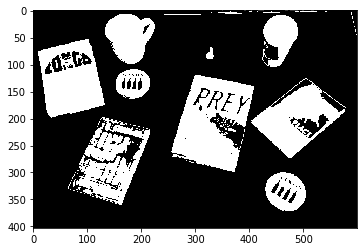

In [24]:
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imshow("", img)

8 4100.0
4 1.0
1 0.0
2 0.0
2 0.0
2 0.0
1 0.0
1 0.0
2 0.0
2 0.0
1 0.0
3 1.0
10 11178.0
7 272.5
6 11870.5
6 18696.5
8 2701.0
10 178.5
4 12816.5
11 3883.5
2 0.0
1 0.0
2 0.0
1 0.0
4 2.0
3 1.0
2 0.0
8 5887.5
4 7.0
8 8.0
8 10.5
4 3.0
2 0.0


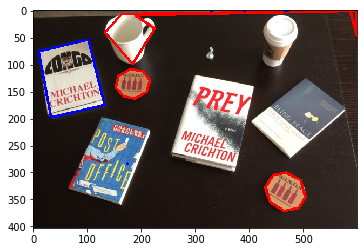

In [25]:
cnts, _ = cv2.findContours(img, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("vision/book.jpg")
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if len(approx) == 8 and area > 200 :        
        cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    if len(approx) == 4 :        
        cv2.drawContours(image, [approx], -1, (255, 0, 0), 4)        

imshow("", image)

8 4100.0
4 1.0
1 0.0
2 0.0
2 0.0
2 0.0
1 0.0
1 0.0
2 0.0
2 0.0
1 0.0
3 1.0
10 11178.0
7 272.5
6 11870.5
6 18696.5
8 2701.0
10 178.5
4 12816.5
11 3883.5
2 0.0
1 0.0
2 0.0
1 0.0
4 2.0
3 1.0
2 0.0
8 5887.5
4 7.0
8 8.0
8 10.5
4 3.0
2 0.0


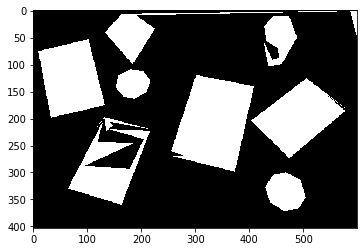

In [27]:
cnts, _ = cv2.findContours(img, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("vision/book.jpg")

mask = np.zeros((image.shape[0], image.shape[1]) , dtype='uint8')
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if  area > 200 :
        cv2.drawContours(mask, [approx], -1, (255, 255, 255), -1)
    

    imshow("", mask)

```
double len = arcLenght(pts, true);
double area = contourArea(pts);
double ratio = 4. * CV_PI * area / (len * len);
```
CV_PI: 원주육 파이값을 저장하고 있는 opencv 상수  

원을 계산할 때 ratio를 계산하여(둥근 정도를 나타냄) 변수 값이 0.8보다 크면 원이라고 판단.

# 다각형 피팅
---

컨투어를 피팅한다는 것은 센터와 반지름을 구한다는 것  

사각형이면 시작점과 끝점을 모델링  



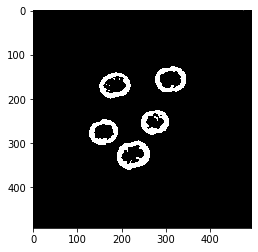

In [33]:
frame = cv2.imread("vision/coin.png", 0)
gray_blur = cv2.GaussianBlur(frame, (7,7), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 45, 6)
# ADAPTIVE_THRESH_GAUSSIAN_C: 거리에 따른 가중치를 준다. 
# 45: 주변에 몇개까지 볼것인가
# 6: 평균에서 6만큼 떨어진 것 까지는 기준점을 움직여 배경영역이 더 많아지고 오브젝트 영역이 더 작아짐

imshow("", thresh)

# _, thresh = cv2.threshold(gray_blur, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
# imshow("", thresh)


안쪽이 완전 채워지게 만들수는 없다.  
지역적으로 밝고 어두움을 구별하기 때문이다.  

일반 `threshold`는 완전 구별해내지 못한다.  


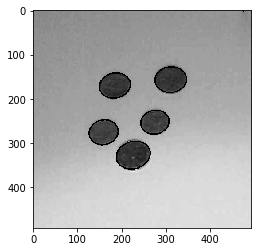

In [36]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if len(cnt) < 5:
        continue
    ellipse =cv2.fitEllipse(cnt) # 타원 맞추기
    cv2.ellipse(frame, ellipse, (0,255, 0), 2)

imshow("", frame)

In [ ]:
image = cv2.imread("vision/5.jpg", 0)


# 손가락 검출
---

## 손가락 5개

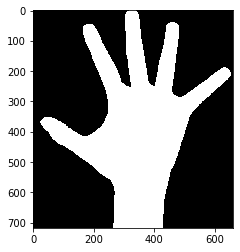

In [108]:
hand_img = cv2.imread('vision/5.jpg')

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0, 23, 0])
upper_band = np.array([255, 189, 255])

mask = cv2.inRange(hsv_img, lower_band, upper_band) # inRange로 특정 HSV 색상 범위 이진화

imshow("", mask)

1
345.5 362.71337890625 363.53997802734375


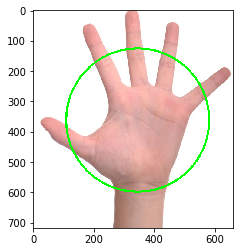

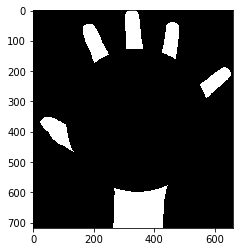

In [109]:
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]

print(len(cnts)) # 영상이 깔끔해서 손만 나옴

(cX, cY), r = cv2.minEnclosingCircle(c) # 컨투어를 원으로 감까는 중심점, 반지름을 return  

print(cX, cY, r) # x점, y점, 반지름

cv2.circle(hand_img, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), 5)
           
imshow("", hand_img)

cv2.circle(mask, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), -1)

imshow("", mask)

In [110]:
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("number of finger is : ",len(cnts)-1)

# for c in cnts:
#     area = cv2.contourArea(c)
#     print(area)
        
#     approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
#     if  area > 10 :
#         cv2.drawContours(mask, [approx], -1, (0, 0, 255), 3)

number of finger is :  6


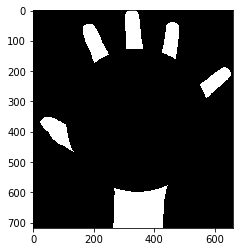

In [111]:
imshow("", mask)

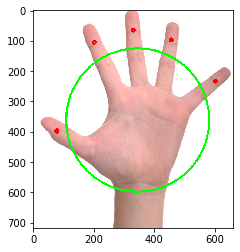

In [114]:
for c in cnts:
    area = cv2.contourArea(c)
    if area> 10:
        M = cv2.moments(c) # x의 i승 y의 j승의 가중치의 면적  
        # sum에 대한 가충치
        cX = int(M["m10"] / M["m00"])    # 축의 센터 point를 계산 가능
        cY = int(M["m01"] / M["m00"])    # m00 : 면적을 의미 x의 0승 y의 0승

        if cY <= 500 :
            cv2.circle(hand_img, (int(cX), int(cY)), 5, (0, 0, 255), 5)
        
imshow("", hand_img)

## 손가락 1개

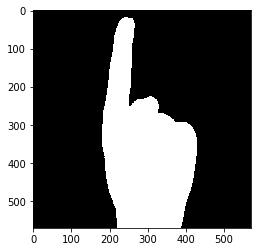

1
302.0 296.5390930175781 284.82275390625


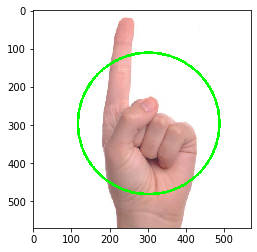

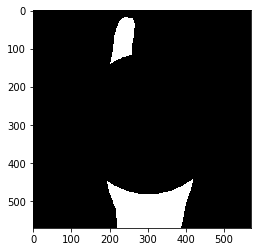

number of finger is :  1


In [63]:
hand_img = cv2.imread('vision/1.jpg')

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0, 23, 0])
upper_band = np.array([255, 189, 255])

mask = cv2.inRange(hsv_img, lower_band, upper_band)

imshow("", mask)

cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]

print(len(cnts)) # 영상이 깔끔해서 손만 나옴

(cX, cY), r = cv2.minEnclosingCircle(c)

print(cX, cY, r) # x점, y점, 반지름

cv2.circle(hand_img, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), 5)
           
imshow("", hand_img)

cv2.circle(mask, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), -1)

imshow("", mask)
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("number of finger is : ",len(cnts)-1)


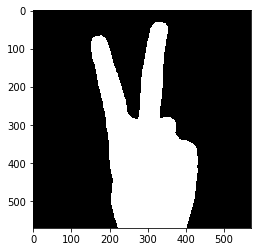

1
302.5169677734375 308.2913513183594 278.68975830078125


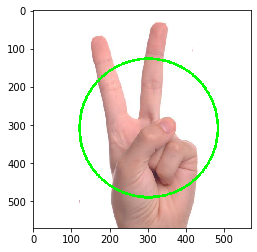

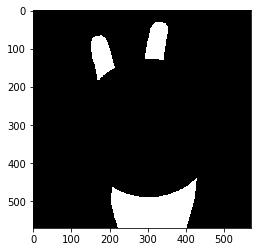

number of finger is :  2


In [102]:
hand_img = cv2.imread('vision/2.jpg')

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0, 23, 0])
upper_band = np.array([255, 189, 255])

mask = cv2.inRange(hsv_img, lower_band, upper_band)
mask = cv2.medianBlur(mask, 5)
imshow("", mask)

cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]

print(len(cnts)) # 영상이 깔끔해서 손만 나옴

(cX, cY), r = cv2.minEnclosingCircle(c)

print(cX, cY, r) # x점, y점, 반지름

cv2.circle(hand_img, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), 5)
           
imshow("", hand_img)

cv2.circle(mask, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), -1)

imshow("", mask)
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("number of finger is : ",len(cnts)-1)


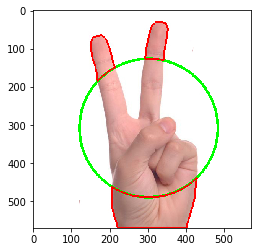

In [95]:
cv2.drawContours(hand_img, cnts, -1, (0,0,255), 3) # -1: all
imshow("",hand_img)

{'m00': 18666.0, 'm10': 5893447.166666666, 'm01': 9715636.166666666, 'm20': 1934494179.5, 'm11': 3062780642.0, 'm02': 5071625049.166666, 'm30': 657141816224.05, 'm21': 1003272607001.3667, 'm12': 1596513640109.4333, 'm03': 2654960506389.35, 'mu20': 73746322.09662747, 'mu11': -4753293.433721542, 'mu02': 14645186.151486397, 'mu30': -207339842.1850586, 'mu21': -628338413.7062683, 'mu12': 189214029.0685959, 'mu03': -61370388.650878906, 'nu20': 0.2116595375508356, 'nu11': -0.013642441567549504, 'nu02': 0.04203319216527099, 'nu30': -0.004355666401176246, 'nu21': -0.013199742453290994, 'nu12': 0.003974890596809083, 'nu03': -0.0012892309411289028}
{'m00': 4598.0, 'm10': 822563.3333333333, 'm01': 551774.6666666666, 'm20': 148056274.3333333, 'm11': 99160598.33333333, 'm02': 69835019.0, 'm30': 26811573082.4, 'm21': 17927861378.833332, 'm12': 12594300837.966667, 'm03': 9253950689.0, 'mu20': 903069.169252336, 'mu11': 450374.526847437, 'mu02': 3620298.953216389, 'mu30': 1802375.8487586975, 'mu21': -5

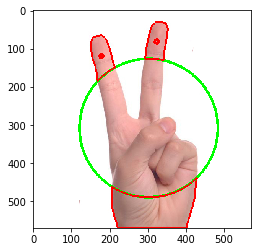

In [96]:
for c in cnts:
    M = cv2.moments(c) # x의 i승 y의 j승의 가중치의 면적  
    # sum에 대한 가충치 (무게중심)
    print(M)
    cX = int(M["m10"] / M["m00"])    # 축의 센터 point를 계산 가능
    cY = int(M["m01"] / M["m00"])    # m00 : 면적을 의미 x의 0승 y의 0승
    
    if cY <= 500 :
        cv2.circle(hand_img, (int(cX), int(cY)), 5, (0, 0, 255), 5)
        
imshow("", hand_img)

### convexHull

들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘

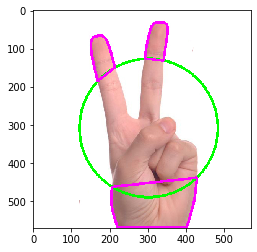

In [104]:
for c in cnts:
    hull = cv2.convexHull(c) # 들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘
    cv2.drawContours(hand_img, [hull], 0, (255, 0, 255), 5)
imshow("", hand_img)

### boundingRect

contour가 다 들어가는 박스를 만드는 알고리즘 

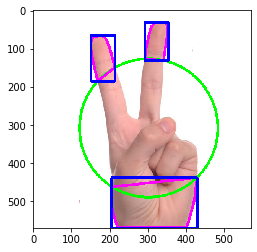

In [106]:
for c in cnts:
    hull = cv2.convexHull(c) # 들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘
    cv2.drawContours(hand_img, [hull], 0, (255, 0, 255), 5)
    
    x, y, w, h = cv2.boundingRect(c) # contour가 다 들어가는 박스를 만드는 알고리즘 
    cv2.rectangle(hand_img, (x, y), (x + w, y + h), (255,0, 0), 5)
    
imshow("", hand_img)

### minAreaRect

최소 영역의 사각형 (회전이 될 수 있음)

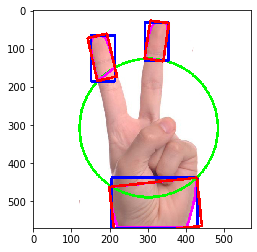

In [107]:
for c in cnts:
    hull = cv2.convexHull(c) # 들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘
    cv2.drawContours(hand_img, [hull], 0, (255, 0, 255), 5)
    
    x, y, w, h = cv2.boundingRect(c) # contour가 다 들어가는 박스를 만드는 알고리즘 
    cv2.rectangle(hand_img, (x, y), (x + w, y + h), (255,0, 0), 5)
    
    rect = cv2.minAreaRect(c) # 최소 영역의 사각형 (회전이 될 수 있음)
    box = cv2.boxPoints(rect) # 포인트를 잡아줌
    box = np.int0(box) # int형으로 변경
    cv2.drawContours(hand_img, [box], 0, (0,0,255), 5)
    
imshow("", hand_img)

# 명함 추출
---

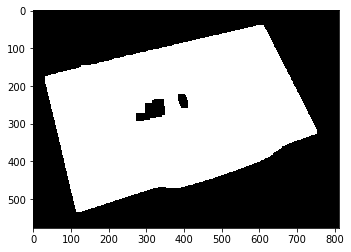

In [2]:
img = cv2.imread('vision/namecard.png', 0)
src_bin = cv2.GaussianBlur(img, (7,7), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_, src_bin = cv2.threshold(src_bin, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel, iterations=2)
src_bin = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel, iterations=3)

# src_bin = 255 - src_bin

imshow("", src_bin)

cnts, _ =  cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

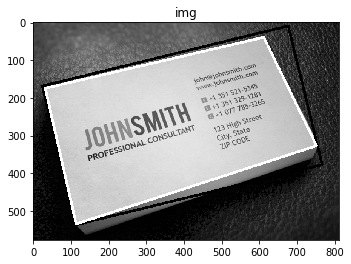

[[[611  40]]

 [[ 32 175]]

 [[114 534]]

 [[751 327]]]


In [3]:
for c in cnts:
    rect = cv2.minAreaRect(c) # 최소 영역의 사각형 (회전이 될 수 있음)
    box = cv2.boxPoints(rect) # 포인트를 잡아줌
    box = np.int0(box) # int형으로 변경
    cv2.drawContours(img, [box], 0, (0,0,255), 5)
        
c = cnts[0]
peri = cv2.arcLength(c, True)    
area = cv2.contourArea(c)    

approx = cv2.approxPolyDP(c, 0.02 * peri, True) 
cv2.drawContours(img, [approx], 0, (255, 0, 0), 5)
imshow("img", img)
print(approx)

In [4]:
def ordering(approx) :
    ps = approx [:,0]
    cx = np.mean(ps[:,0])
    cy = np.mean(ps[:,1])    
    pts = np.zeros((4,2), dtype='float32')    
    for p in ps :
        sx = p[0] - cx
        sy = p[1] - cy
        if  sx < 0 and sy < 0  : pts[0] = p
        if  sx > 0 and sy < 0  : pts[1] = p
        if  sx < 0 and sy > 0  : pts[2] = p
        if  sx > 0 and sy > 0  : pts[3] = p    
    return pts

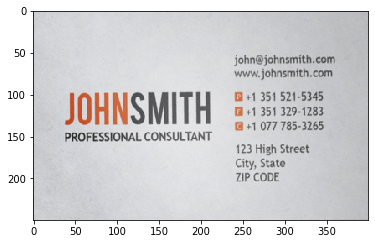

In [5]:
img = cv2.imread("vision/namecard.png")

pts1 = ordering(approx)
pts2 = np.float32([[0,0],[400,0],[0,250],[400,250]])
M = cv2.getPerspectiveTransform(pts1,pts2)
img_result = cv2.warpPerspective(img, M, (400,250))        

imshow("", img_result)

In [7]:
print(pytesseract.image_to_string(img_result))

JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com
www.johnsmith.com

+1 351 521-5345
+1 351 329-1283
+1 077 785-3265,

123 High Street
City, State
ZIP CODE



# 책 검출
---

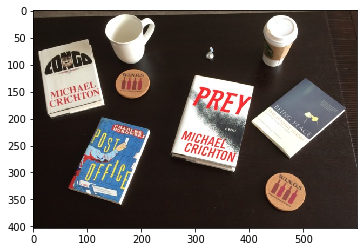

[[127. 198.]
 [216. 223.]
 [ 65. 329.]
 [163. 359.]]


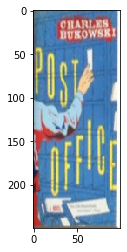

[[506. 126.]
 [579. 182.]
 [474. 273.]
 [579. 182.]]


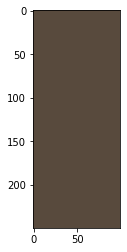

[[302. 120.]
 [408. 141.]
 [257. 269.]
 [373. 298.]]


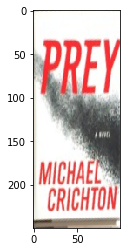

[[ 10.  76.]
 [102.  54.]
 [ 33. 198.]
 [132. 175.]]


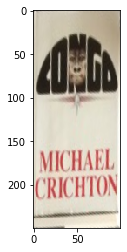

In [199]:
image = cv2.imread('vision/book.jpg')
imshow("", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)

cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.imread("vision/book.jpg")

for c in cnts:
    peri = cv2.arcLength(c, True)    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    if len(approx) == 4 :        
        pts1 = ordering(approx)
        print(pts1)
        pts2 = np.float32([[0,0], [100, 0], [0, 250], [100, 250]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        dst = cv2.warpPerspective(image, M, (100, 250))
        imshow("", dst)        
       

# OCR
---

In [1]:
import sys
import cv2
import numpy as np
import random
import pytesseract

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [9]:
print(pytesseract.image_to_string("vision/ocr-korean.png", lang="kor"))

가장 많이 본 뉴스                    더보기

정치 경제 사회 생활/문화 세계  |!)/과학

[속보] 서울 롯데리아 직원 19명 모임에서 9명 확진

박성중이 공개한 「다주택 김조원 가정사 '재론도 …

박성중 "다주택자 김조원 재론한 사정 있어"

[단독]우원식 "김조원 가정사 이해하라고?"퍼북 …

"신임수석 둘다 1주택자로 보면 된다" 다주택 먼…
박성중 군대동기 김조원의 강남 집 2채에 '재론…
류호정 “심상정과 수해 현장서 정말 열심히 일했…

호:
조원 군대 동기 박성중 “부인하고 관계

뜨

1
2
3
4
5
6 [알앤써치] ※대통령 지지율 38796.40%선 마저 …
7
8
9
10

 

[속보] 박성중 "다주택자 김조원, 자



번호판 인식은 적외선 카메라를 사용함.  

카메라 구도도 처리하기 좋은 자리에 둠  

사진 영상도 커야함  

가우시안 블러 안하면 6을 인식 못하였음

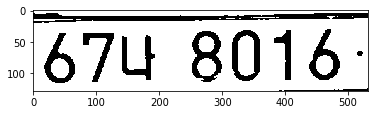

67나 8016ㆍ



In [22]:
img = cv2.imread("vision/plate1.png", 0)
img = cv2.GaussianBlur(img, (5,5), 0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow("", binary)
print(pytesseract.image_to_string(binary, lang="kor"))

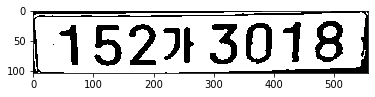

| 152가 3018 |



In [21]:
img = cv2.imread("vision/plate2.png", 0)
img = cv2.GaussianBlur(img, (5,5), 0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow("", binary)
print(pytesseract.image_to_string(binary, lang="kor"))

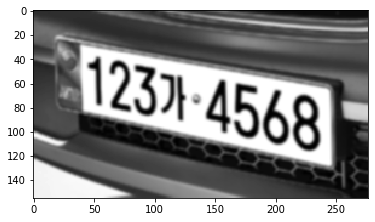

…_



In [24]:
img = cv2.imread("vision/plate3.png", 0)
img = cv2.GaussianBlur(img, (5,5), 0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow("", img)
print(pytesseract.image_to_string(binary, lang="kor"))

...?

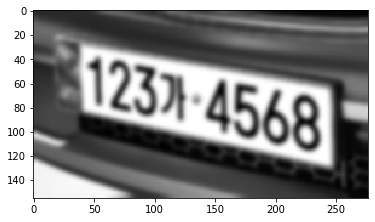

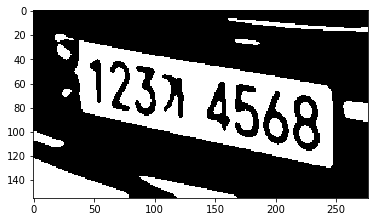

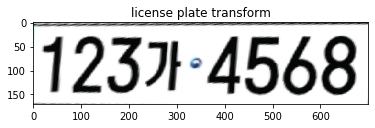

OCR 결과: 123가4568



In [69]:
img = cv2.imread("vision/plate3.png", 0)
img = cv2.GaussianBlur(img, (11,11), 0)
imshow("", img)

_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow("", binary)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.imread("vision/plate3.png")
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    area = cv2.contourArea(c)
    if area >= 10000 and len(approx) == 4:
        pts1 = ordering(approx)
        pts2 = np.float32([[0,0], [700,0], [0,170],[700,170]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        dst = cv2.warpPerspective(image, M, (700, 170))
        imshow("license plate transform", dst)        
print("OCR 결과:", pytesseract.image_to_string(dst, lang="kor"))

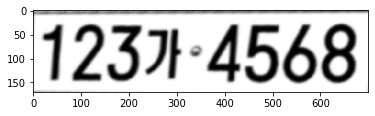

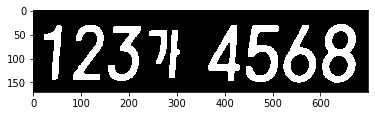

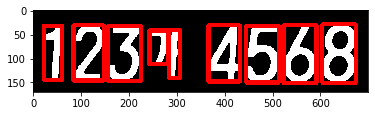

In [70]:
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

dst = cv2.GaussianBlur(dst, (11,11), 0)
imshow("", dst)

_, binary = cv2.threshold(dst, 128, 255, cv2.THRESH_BINARY_INV)

closed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, None, iterations=4)

contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imshow("", closed)
img_color = cv2.cvtColor(closed, cv2.COLOR_GRAY2BGR)

for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_color, (x,y), (x+w, y+h), (0,0,255), 8)

imshow('', img_color)


# Web 기반 모니터링
---


In [72]:
%%writefile server.py

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요<h1>
    """
    return html

if __name__== '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


In [73]:
import requests

response = requests.get("http://localhost:8000")
# 접속해서 request를 받아옴
print(response.text)



    <h1>안녕하세요<h1>
    


In [75]:
from IPython.core.display import HTML
HTML(response.text) # 실시간으로 가져오는 것이 아님

In [85]:
response = requests.get("http://localhost:8000/fun?op1=1&op2=3")
# 내가 실행할 라우터 주소 :fun
# 전달해야 할 데이터 
# op1 = 1
# op = 3
# CGI: 외부에서 웹으로 데이터를 주고받기위한 규약 

print(response.text)

<font color=blue>4</font>


In [84]:
%%writefile server.py

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요<h1>
    """
    return html

@app.route('/fun')
def fun():
    op1 = int(request.args.get("op1")) # get값으로 key를 받아옴
    op2 = int(request.args.get("op2")) # get값으로 key를 받아옴
    html = "<font color=blue>" + str(op1+op2) + "</font>"
    
    return html


if __name__== '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


In [86]:
HTML(response.text)

In [98]:
datas = [7.5, 6.7, 0.5, 3.4]
for data in datas:
    response = requests.get("http://localhost:8000/signal?data=" + str(data))
    # 동기방식으로 작동하기 떄문에 동시에 실행하려면 쓰레드로 별도 돌려야함
    
    print(response.text)

['7.5', '6.7', '0.5', '3.4', '7.5']
['7.5', '6.7', '0.5', '3.4', '7.5', '6.7']
['7.5', '6.7', '0.5', '3.4', '7.5', '6.7', '0.5']
['7.5', '6.7', '0.5', '3.4', '7.5', '6.7', '0.5', '3.4']


In [88]:
%%writefile server.py

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요<h1>
    """
    return html

datas = []

@app.route('/signal')
def signal():
    global datas # global 변수인 것 명시
    datas.append( request.args.get("data") )
    return str(datas)


if __name__== '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


In [96]:
%%writefile server.py

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요<h1>
    """
    return html

datas = []

@app.route('/signal')
def signal():
    global datas # global 변수인 것 명시
    datas.append( request.args.get("data") )
    return str(datas)

@app.route('/view')
def view():
    global datas # global 변수인 것 명시
    
    html = """
    <meta http-equiv="refresh" content="5;url=/view" />
    """ + str(datas)
    return html


if __name__== '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py
